# Import the various libraries

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df=pd.read_csv("dataset_model.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Problem 1-** Identify & Remove the field that is providing only unique information about records .Capture it in another dataframe

In [209]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [210]:
df.shape

(614, 13)

In [211]:
df['Loan_ID'].unique().size


614

In [201]:
df['Gender'].unique().size


3

In [202]:
df['Education'].unique().size

2

In [0]:
df['Self_Employed'].unique().size


3

In [0]:
df['ApplicantIncome'].unique().size

505

In [0]:
df.drop('Loan_ID', axis=1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Problem 2-** Identifying Continous & Categorical Columns

***Categorical Columns***

In [203]:
#Categorical variable
for i in df:
  if len(df[i].unique())<=5:
    print(i)

Gender
Married
Dependents
Education
Self_Employed
Credit_History
Property_Area
Loan_Status


In [204]:
#Continous variable
a = df._get_numeric_data().columns
print(a)
for i in a:
  if len(df[i].unique())>5:
    print(i)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term


**Problem 3-** Performing Uni-variate Analysis with Plots.Record your Observations

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b3458c5c0>


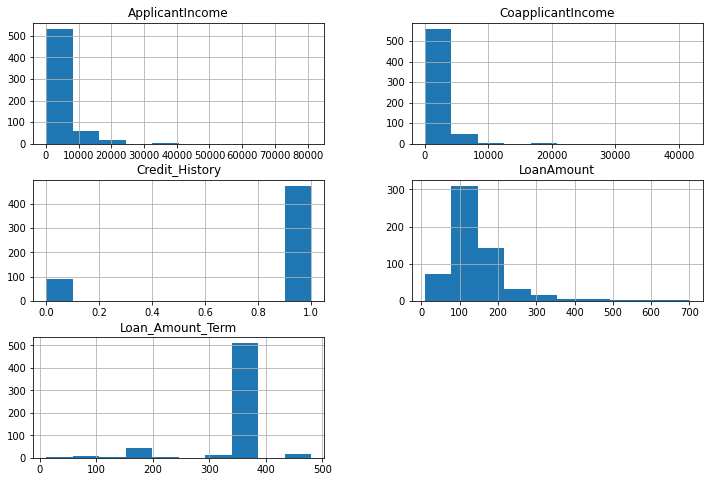

In [0]:
a=df.hist(figsize=[12,8])
print(a)

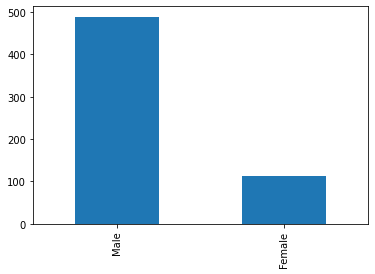

In [0]:
df['Gender'].value_counts().plot.bar()

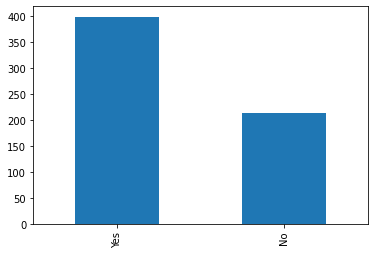

In [0]:
df['Married'].value_counts().plot.bar()

In [0]:
df['Education'].value_counts().plot.bar()

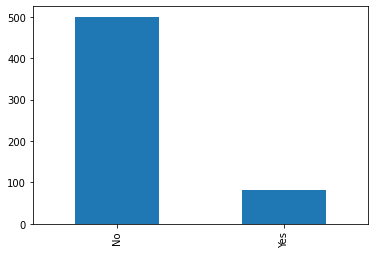

In [0]:
df['Self_Employed'].value_counts().plot.bar()

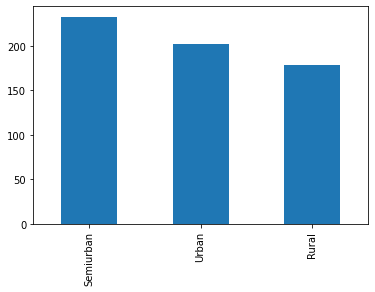

In [0]:
df['Property_Area'].value_counts().plot.bar()

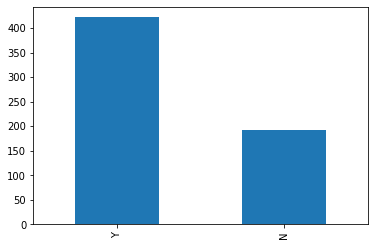

In [0]:
df['Loan_Status'].value_counts().plot.bar()

**Problem 4-** Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations

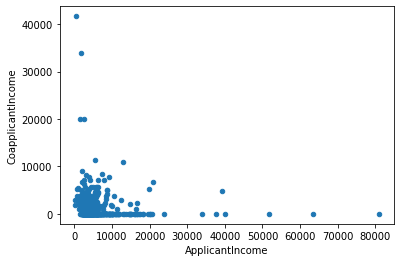

In [0]:
df.plot.scatter(x='ApplicantIncome', y='CoapplicantIncome')

In [0]:
df.plot.scatter(x='Loan_Amount_Term', y='LoanAmount')

**Problem 5-** Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc

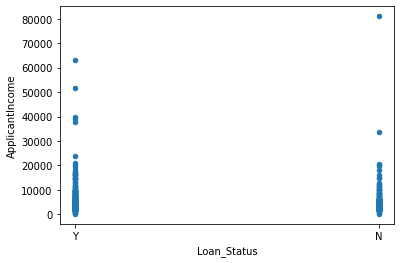

In [0]:
df.plot.scatter(x='Loan_Status', y='ApplicantIncome')

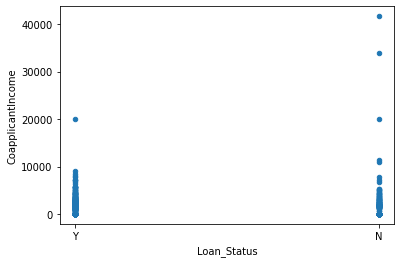

In [0]:
df.plot.scatter(x='Loan_Status', y='CoapplicantIncome')

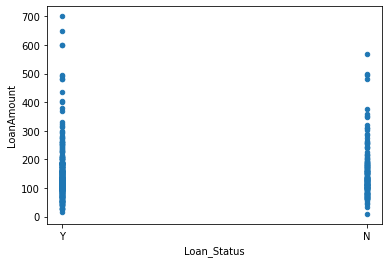

In [0]:
df.plot.scatter(x= 'Loan_Status',y= 'LoanAmount')

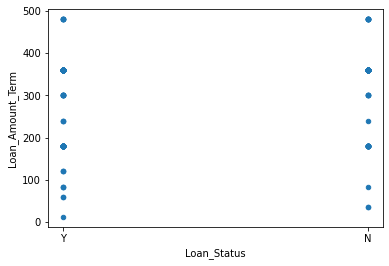

In [0]:
df.plot.scatter(x= 'Loan_Status',y= 'Loan_Amount_Term')

**Problem 6-** How is the class distribution (Y/N) in Label(Target) Variable ?

In [0]:
df.groupby('Loan_Status').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,192,187,192,186,192,183,192,192,181,186,179,192
Y,422,414,419,413,422,399,422,422,411,414,385,422


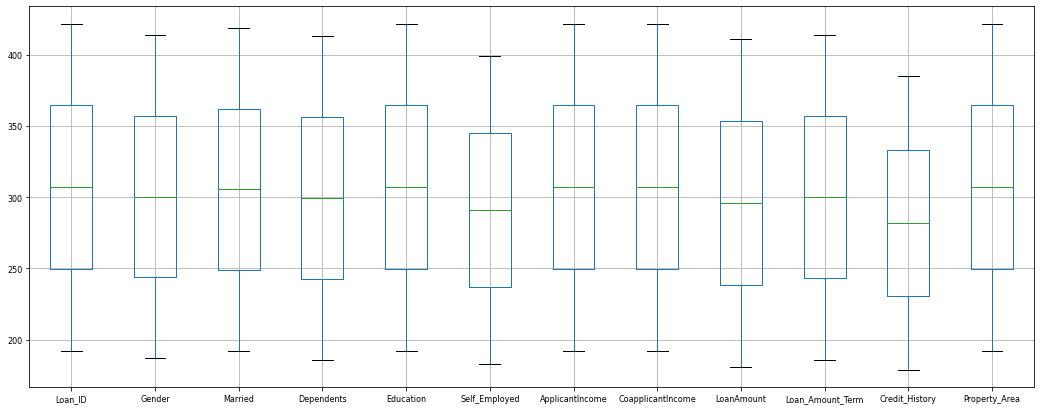

In [0]:
df.groupby('Loan_Status').count().boxplot(figsize=[18,7],fontsize=8)

In [0]:
corr = df.corr()
corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


**Problem 7 Identify the Independent Variables that have missing values**.

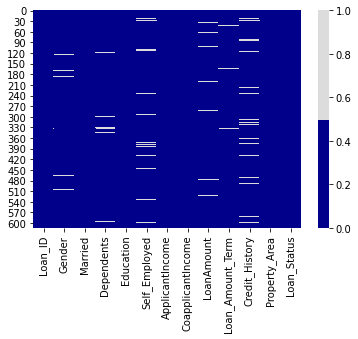

In [185]:
cols = df.columns[:] 
colours = ['#00008B', '#DCDCDC'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

variables containing msssing values 1.Gender 2.dependents 3.self employed 4loa amount 5.credit history


**Problem 8 - Handle missing values appropriately , explain the technique applied for each case**

In [0]:
# Replace values with NaN
data= df.replace('male', np.nan)

In [207]:
# Replace values with NaN
data['Gender'] = data['Gender'].replace('male', np.nan)
data.isnull().sum()



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

created missing indicator for: Gender
created missing indicator for: Married
created missing indicator for: Dependents
created missing indicator for: Self_Employed
created missing indicator for: LoanAmount
created missing indicator for: Loan_Amount_Term
created missing indicator for: Credit_History


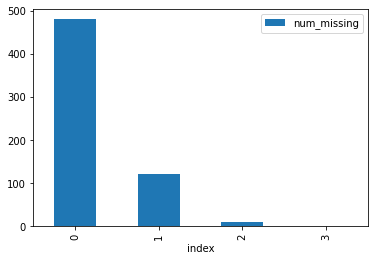

In [0]:
#Missing data Histogram
# first create missing indicator for features with missing data
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [0]:
#Impute the observation
# replace missing values with the median.
print("values before imputing")
for v in data['LoanAmount']:
    print(v)
med = data['LoanAmount'].median()
print("Median")
print(med)
data['LoanAmount'] = data['LoanAmount'].fillna(med)
print("values after imputing")
for k in data['LoanAmount']:
    print(k)

# As this code we replace the nun value with median in all columns 


values before imputing
128.0
128.0
66.0
120.0
141.0
267.0
95.0
158.0
168.0
349.0
70.0
109.0
200.0
114.0
17.0
125.0
100.0
76.0
133.0
115.0
104.0
315.0
116.0
112.0
151.0
191.0
122.0
110.0
35.0
120.0
201.0
74.0
106.0
114.0
320.0
128.0
100.0
144.0
184.0
110.0
80.0
47.0
75.0
134.0
96.0
88.0
44.0
144.0
120.0
144.0
100.0
120.0
112.0
134.0
286.0
97.0
96.0
135.0
180.0
144.0
120.0
99.0
165.0
128.0
116.0
258.0
126.0
312.0
125.0
136.0
172.0
97.0
81.0
95.0
187.0
113.0
176.0
110.0
180.0
130.0
111.0
128.0
167.0
265.0
50.0
136.0
99.0
104.0
210.0
175.0
131.0
188.0
81.0
122.0
25.0
128.0
137.0
50.0
115.0
131.0
133.0
151.0
128.0
128.0
160.0
100.0
225.0
120.0
216.0
94.0
136.0
139.0
152.0
128.0
118.0
185.0
154.0
85.0
175.0
259.0
180.0
44.0
137.0
81.0
194.0
93.0
370.0
128.0
160.0
182.0
650.0
74.0
70.0
25.0
102.0
290.0
84.0
88.0
242.0
129.0
185.0
168.0
175.0
122.0
187.0
100.0
70.0
30.0
225.0
125.0
118.0
152.0
244.0
113.0
50.0
600.0
160.0
187.0
120.0
255.0
98.0
275.0
121.0
158.0
75.0
182.0
112.0
129.0
63.0
200

**Problem 9. Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e9b86d6a0>]],
      dtype=object)

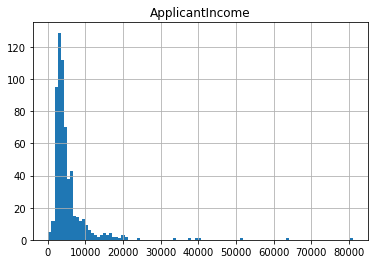

In [0]:
df.hist('ApplicantIncome', bins=100)

In [0]:
df['ApplicantIncome'].describe()


count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e9cf334a8>]],
      dtype=object)

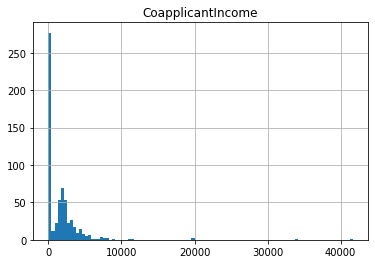

In [212]:
df.hist('CoapplicantIncome', bins=100)

In [213]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e9d1b6ac8>]],
      dtype=object)

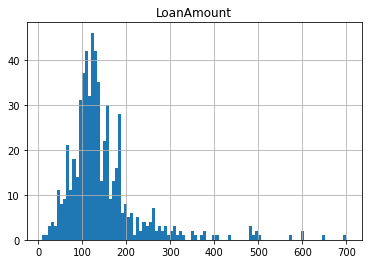

In [214]:
df.hist('LoanAmount', bins=100)


In [215]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

**Problem 10 - Use Box-Plot chart to represent the Outliers for each Independent Variable**

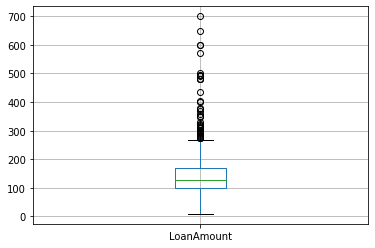

In [216]:
df.boxplot(column=['LoanAmount'])


In [217]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

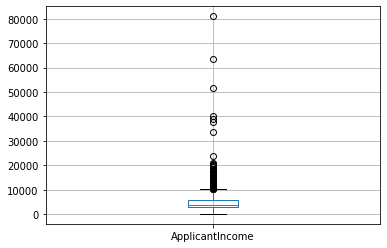

In [218]:
df.boxplot(column=['ApplicantIncome'])

In [219]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

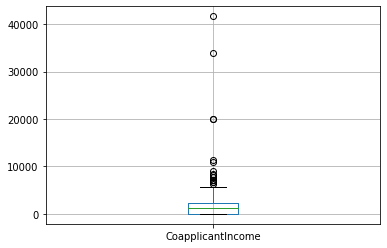

In [220]:
df.boxplot(column=['CoapplicantIncome'])

In [221]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

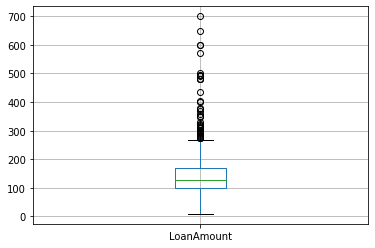

In [222]:
df.boxplot(column=['LoanAmount'])

In [0]:
data['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

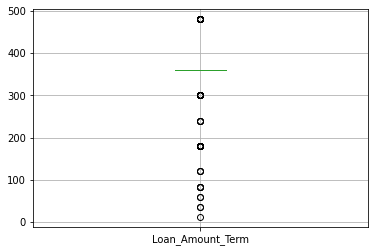

In [223]:
df.boxplot(column=['Loan_Amount_Term'])

In [224]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

**Step1**

**Perform Label Encoding on Target Variable (Loan_Status).**

In [229]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer
LE = LabelEncoder()
df_enc=df.copy()
df_enc['Loan_Status'] = LE.fit_transform(df['Loan_Status'])
df_enc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1




**Step-2**

Perform Label Encoding on Categorical Independent Variables.**


In [0]:
from sklearn.preprocessing import OneHotEncoder 
df4=df.drop(['Loan_Status','Loan_ID','LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome'],axis=1)
dfEnc = df.copy()
dfEnc['Self_Employed'].replace({0:"No"},inplace=True)
dfEnc['Married'].replace({0:"No"},inplace=True)
dfEnc['Dependents'].replace({"3+":'3',0:'0'},inplace=True)
for i in df :
  print(i)
  dfEnc[i+"_enc"] = LE.fit_transform(dfEnc[i])
  dfEnc = dfEnc.drop(i,axis=1)
dfEnc.head()



**step #3 Perform One Hot Encoding on Categorical Independent Variables.**

In [234]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=df.copy()
df_ohe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [235]:
df_enc=pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Loan_Amount_Term','Credit_History',])
df_enc.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0
0,LP001002,0,5849,0.0,NaN,Urban,Y,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,LP001003,1,4583,1508.0,128.0,Rural,N,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,LP001005,0,3000,0.0,66.0,Urban,Y,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,Urban,Y,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,Urban,Y,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [236]:
df_enc.shape

(614, 27)

In [237]:
enc_corr=df_enc.corr()
enc_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0
ApplicantIncome,1.000000,-0.116605,0.570909,-0.058809,0.013933,-0.051708,0.050194,0.140760,-0.140760,-0.121356,0.127180,-0.005151,-0.018580,-0.003474,-0.016914,-0.029970,0.069387,0.006690,0.067018,-0.038677,-0.026042,0.018615,0.006986
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.082912,0.082316,-0.075948,0.080496,0.062290,-0.062290,-0.028834,-0.016100,0.017070,-0.031698,0.024034,-0.014616,-0.030178,0.088838,-0.044901,0.033155,-0.045200,-0.032920,-0.011134,-0.058795
LoanAmount,0.570909,0.188619,1.000000,-0.109520,0.065501,-0.149743,0.148367,0.171133,-0.171133,-0.114148,0.117421,-0.017034,-0.019685,-0.004366,-0.013659,-0.103552,0.003592,-0.023434,0.067884,0.021745,0.010159,0.001463,-0.035156
Gender_Female,-0.058809,-0.082912,-0.109520,1.000000,-0.934236,0.364569,-0.367389,0.045364,-0.045364,-0.023918,0.000525,-0.019078,0.047012,-0.027002,0.014173,-0.033098,-0.082181,0.014173,-0.040174,0.052190,0.034526,0.009170,-0.026655
Gender_Male,0.013933,0.082316,0.065501,-0.934236,1.000000,-0.336818,0.339026,-0.061497,0.061497,0.039440,-0.027421,0.020421,-0.042082,0.028903,-0.009335,0.035428,0.077745,-0.009335,0.018167,-0.051788,-0.024792,-0.021612,0.035780
Married_No,-0.051708,-0.075948,-0.149743,0.364569,-0.336818,1.000000,-0.989310,0.012304,-0.012304,-0.021584,-0.004489,-0.029437,0.078437,0.018387,-0.059018,-0.001998,-0.096363,-0.016486,-0.035885,0.049500,0.084144,0.010938,0.018150
Married_Yes,0.050194,0.080496,0.148367,-0.367389,0.339026,-0.989310,1.000000,-0.017671,0.017671,0.016628,0.008491,0.029755,-0.077599,-0.017742,0.059655,0.002709,0.098894,-0.025133,0.037273,-0.035580,-0.104345,-0.006690,-0.023626
Education_Graduate,0.140760,0.062290,0.171133,0.045364,-0.061497,0.012304,-0.017671,1.000000,-1.000000,-0.019059,0.010383,0.021340,-0.038995,-0.038995,0.042786,-0.019525,-0.097799,-0.006226,-0.004461,0.113773,-0.018553,-0.073658,0.081637
Education_Not Graduate,-0.140760,-0.062290,-0.171133,-0.045364,0.061497,-0.012304,0.017671,-1.000000,1.000000,0.019059,-0.010383,-0.021340,0.038995,0.038995,-0.042786,0.019525,0.097799,0.006226,0.004461,-0.113773,0.018553,0.073658,-0.081637
Self_Employed_No,-0.121356,-0.028834,-0.114148,-0.023918,0.039440,-0.021584,0.016628,-0.019059,0.019059,1.000000,-0.822212,0.019286,0.027296,-0.046212,-0.013398,-0.026610,-0.013489,-0.013398,-0.017059,0.011950,0.048430,0.041932,0.001923


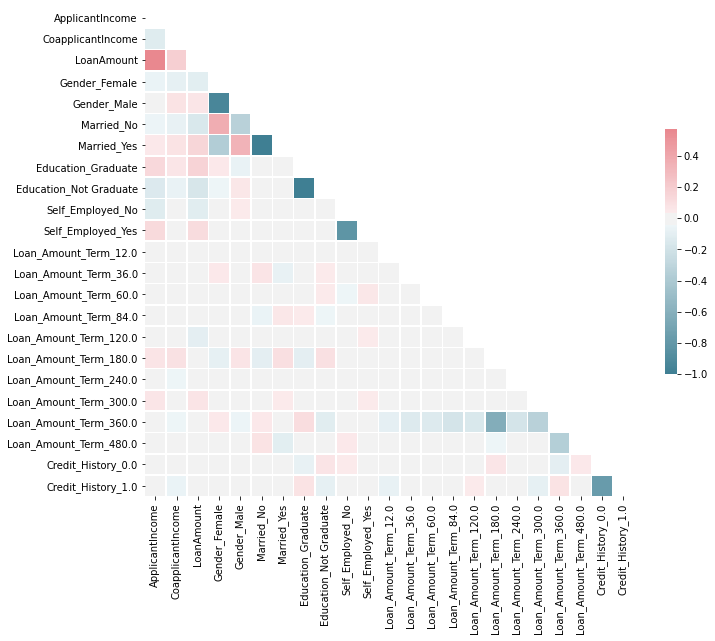

In [238]:
mask = np.zeros_like(enc_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(enc_corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})